In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## Data Understanding 

#### This dataset is designed to examine the factors which influence the academic student performance

### No.of independent variables are : 5
#### Hours Studied : Total Number of Hours Student studied daily
#### Previous Scores: previous test scores
#### Extracurricular Activities: Boolean value represent wheather the student participated in extracuricular activities or not
#### Sleep Hours: Average sleep hours per day
#### Sample Question Papers Practiced: number of sample paper practiced 

### Dependent Variable or Target Variable
#### Performance Index: It has a value ranges from 10 to 100 higher value represents better performance


## Loading the Dataset 

In [3]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().sum()

127

In [7]:
duplicated_percentage = (df.duplicated().sum()/df.shape[0])*100
print(duplicated_percentage)

1.27


In [8]:
## since duplicates value is very few so we are dropping them

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

## EDA 

In [11]:
## segregating numerical and categorical columns

In [12]:
categorical_column=[]
numerical_column=[]
for col in list(df.columns):
    if df[col].dtype=='O':
        categorical_column.append(col)
    else:
        numerical_column.append(col)

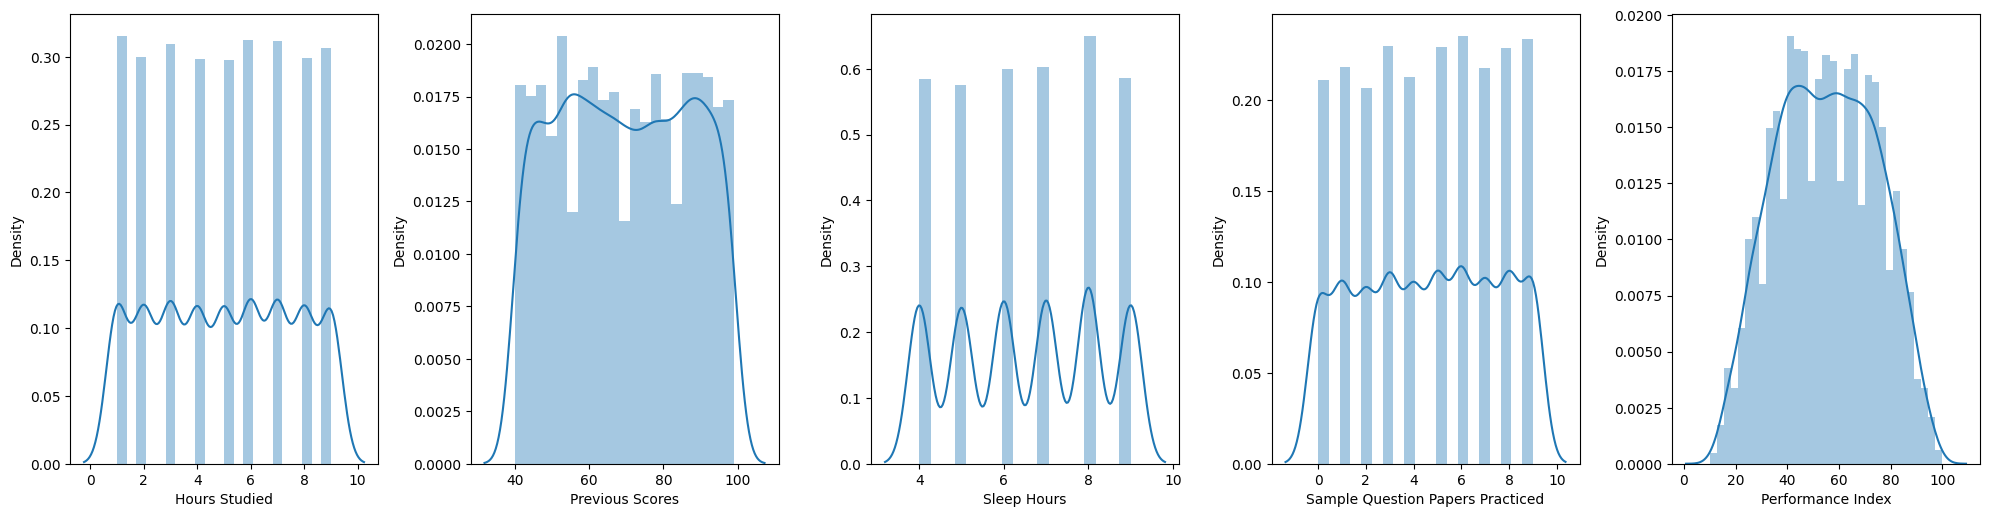

In [13]:
plt.figure(figsize=(20,15))
plotnumber = 1

for col in numerical_column:
    if plotnumber<=len(numerical_column):
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.title('')
plt.tight_layout()
plt.show()

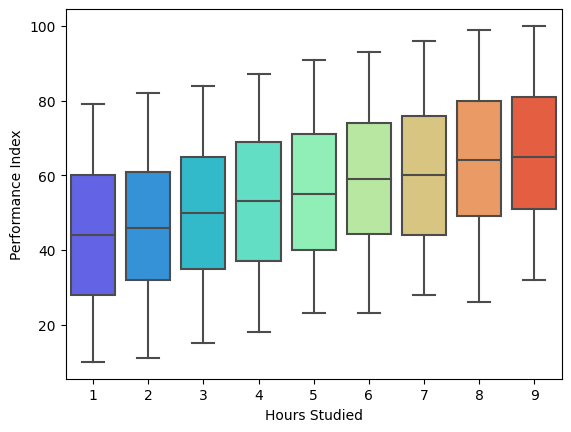

In [14]:
sns.boxplot(x=df['Hours Studied'],y=df['Performance Index'],palette='rainbow')
plt.show()

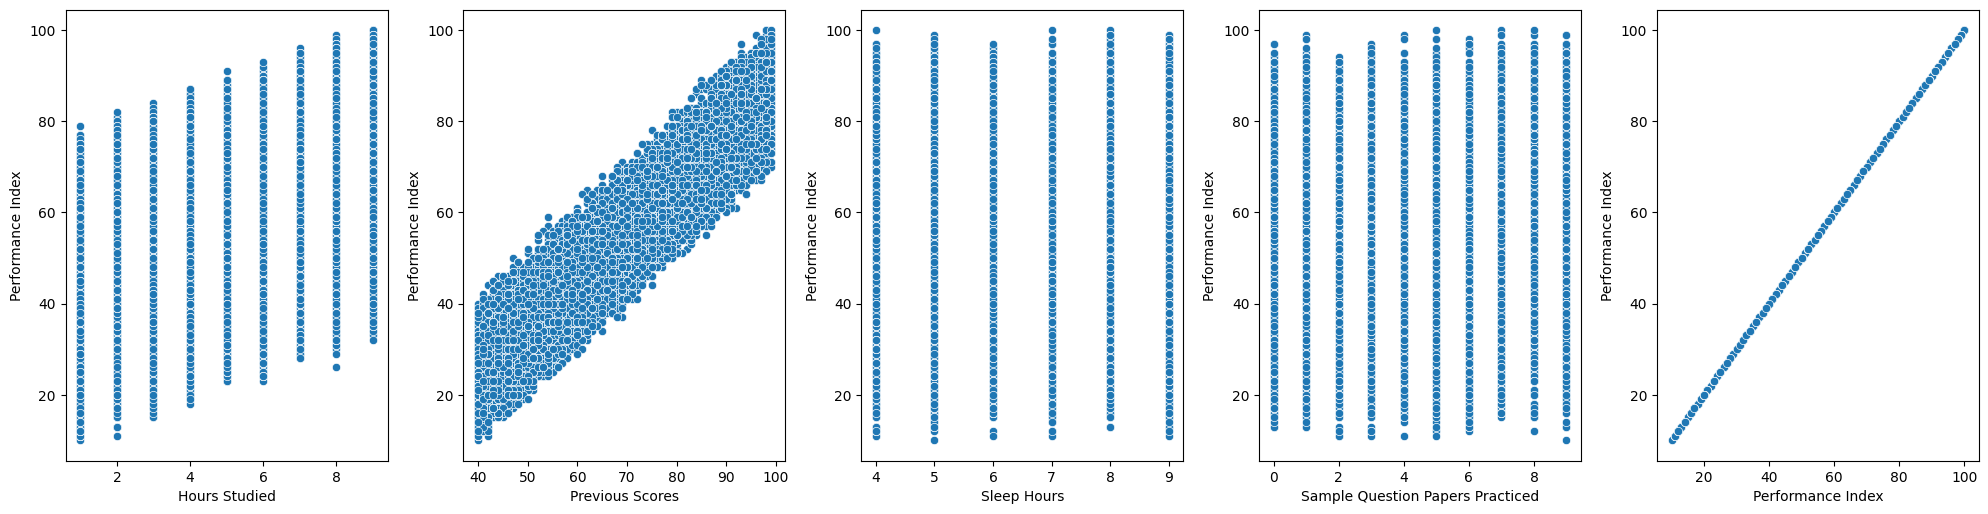

In [15]:
plt.figure(figsize=(20,15))
plotnumber = 1
for col in numerical_column:
    if plotnumber<=len(numerical_column):
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x=df[col],y=df['Performance Index'])
        plt.xlabel(col)
    plotnumber+=1
plt.title('')
plt.tight_layout()
plt.show()


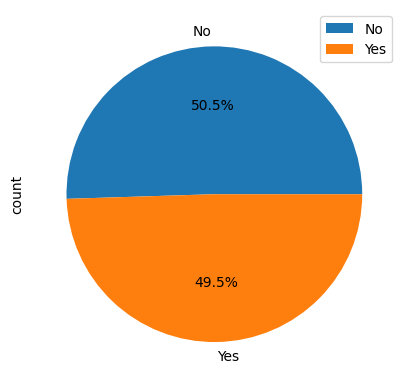

In [16]:
df['Extracurricular Activities'].value_counts().plot.pie(autopct='%1.1f%%',legend=True)
plt.show()

## Data Preprocessing

In [17]:
## converting the object type column or feature into numerical feature by using OneHotEncoding

In [18]:
extracurricular_activities = pd.get_dummies(df['Extracurricular Activities'],drop_first=True,dtype=int)
df['extracurricular_activities'] = extracurricular_activities['Yes']
df.drop('Extracurricular Activities',axis=1,inplace=True)

In [19]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
extracurricular_activities            int64
dtype: object

In [20]:
df.corr().T

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,extracurricular_activities
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332,0.004899
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135,0.009534
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352,-0.024008
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436,0.013839
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000,0.026075
extracurricular_activities,0.004899,0.009534,-0.024008,0.013839,0.026075,1.000000


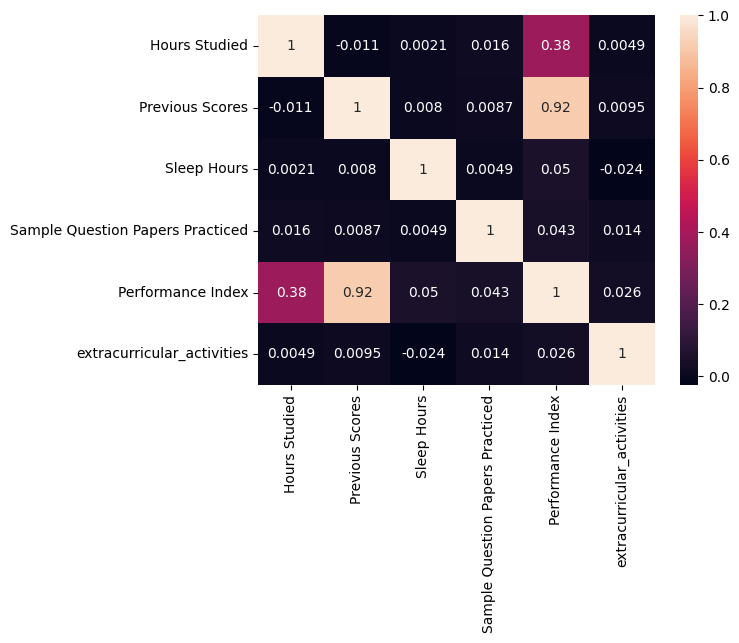

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Converting dataset into X and y

In [22]:
X = df.drop('Performance Index',axis=1)
y = df['Performance Index']

### Train Test Split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Model Training

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_predict = model.predict(X_test)

In [26]:
coef = model.coef_
intercept = model.intercept_
print('Regression Line coeffiecients are :',coef)
print('Regression Line intercept is  :',intercept)

Regression Line coeffiecients are : [2.85632311 1.01870555 0.48366393 0.18082621 0.64060356]
Regression Line intercept is  : -34.094038319658814


## compare the prediction and actual value

In [27]:
compare = pd.DataFrame({'y_actual':y_test,'y_predicted':y_predict})
compare

,y_actual,y_predicted
4811,56.0,56.006881
9190,48.0,47.206189
5528,65.0,66.581388
6546,68.0,69.929128
4036,49.0,51.071923
...,...,...
4252,77.0,76.949874
1821,87.0,86.955499
1076,62.0,62.055917
7727,42.0,42.092607


## Model Evaluation

In [28]:
r_square = r2_score(y_test,y_predict)
print(f'R_Square is : {round(r_square*100,1)}')
print(f'Mean Squared Error is : {round(mean_squared_error(y_test,y_predict),2)}')
print(f'Mean Absolute Error is : {round(mean_absolute_error(y_test,y_predict),2)}')
N = len(y_test)
P = X_test.shape[1]
adj_rsquare = 1 - ((1-r_square)*(N-1)/N-P-1)
print(f"Adjusted R_Square is : {adj_rsquare}")
print(f"Difference b/w R_square and Adjusted R_Square is ",r_square-adj_rsquare)

R_Square is : 98.9
Mean Squared Error is : 4.16
Mean Absolute Error is : 1.62
Adjusted R_Square is : 6.988801658050613
Difference b/w R_square and Adjusted R_Square is  -6.0000037819459475
